**Задание 17.4.4**
Найдите прямую, у которой сумма квадратов расстояний до точек (0, 0), (1, 1), (2, 1) будет минимальной.
Чему равна при этом доля объяснённого разброса точек? 
Ответ округлите до сотых.
Решать методом гавных компонент (PCA).

Прямая y = 0.5352x + 0.1315
Доля объяснённого разброса точек: 0.95


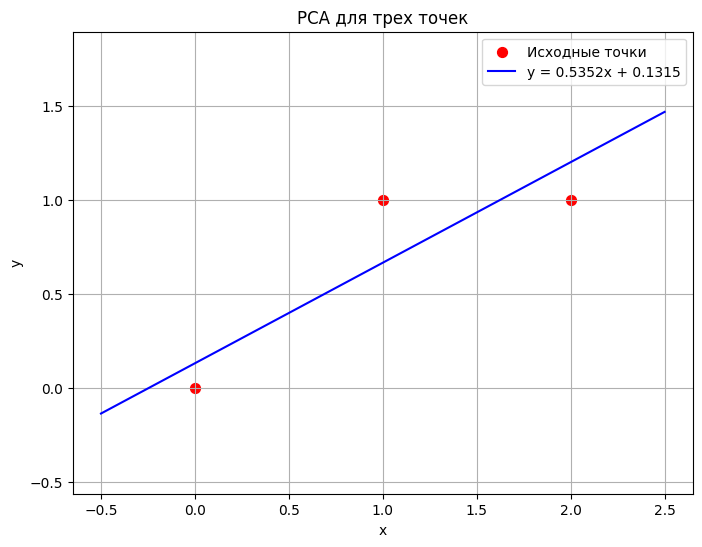

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Задаем исходные точки
X = np.array([[0, 0], [1, 1], [2, 1]])

# Применяем PCA
pca = PCA(n_components=2)
pca.fit(X)

# Первая главная компонента - это направление прямой с минимальной суммой квадратов расстояний
component = pca.components_[0]
explained_variance_ratio = pca.explained_variance_ratio_[0]

# Вычисляем среднее значение для нахождения центра данных
mean = np.mean(X, axis=0)

# Уравнение прямой будет: y - mean_y = slope * (x - mean_x)
# где slope = component[1] / component[0]
slope = component[1] / component[0]
intercept = mean[1] - slope * mean[0]

print(f"Прямая y = {slope:.4f}x + {intercept:.4f}")
print(f"Доля объяснённого разброса точек: {explained_variance_ratio:.2f}")

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='red', s=50, label='Исходные точки')

# Показываем найденную прямую
x_line = np.linspace(-0.5, 2.5, 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, 'b-', label=f'y = {slope:.4f}x + {intercept:.4f}')

plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title('PCA для трех точек')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [27]:
X_centered = X - (X[:,0].mean(), X[:,1].mean())

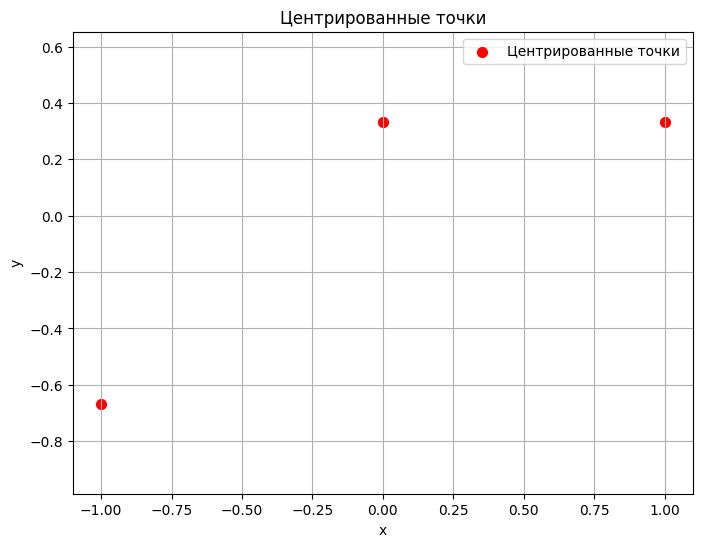

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], c='red', s=50, label='Центрированные точки')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title('Центрированные точки')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [47]:
covmat = np.cov(X_centered, rowvar=False)
print(covmat)
print


[[1.         0.5       ]
 [0.5        0.33333333]]


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [71]:
# Собственные вектора и собственные значения
eigenvals, eigenvecs = np.linalg.eig(covmat)
print(f'Собственные значения:\n{eigenvals}')
print(f'Собственные вектора:\n{eigenvecs}')

# Важно: собственные вектора - это столбцы матрицы eigenvecs
print(eigenvecs[:,0], eigenvecs[:,1])

# Если транспонировать, то получим строки матрицы pca.components_
print(f'\nСобственные вектора (транспонированные):\n{eigenvecs.T}')
# в PCA собственные вектора - это строки матрицы pca.components_
print(f'\nСобственные вектора (PCA):\n{pca.components_}')

Собственные значения:
[1.26759188 0.06574145]
Собственные вектора:
[[ 0.8816746  -0.47185793]
 [ 0.47185793  0.8816746 ]]
[0.8816746  0.47185793] [-0.47185793  0.8816746 ]

Собственные вектора (транспонированные):
[[ 0.8816746   0.47185793]
 [-0.47185793  0.8816746 ]]

Собственные вектора (PCA):
[[ 0.8816746   0.47185793]
 [-0.47185793  0.8816746 ]]


In [72]:
# доля объяснённого разброса точек
print(f'Доля объяснённого разброса точек (собственные значения):\n{eigenvals / np.sum(eigenvals)}')
print(f'Доля объяснённого разброса точек (PCA):\n{pca.explained_variance_ratio_}')

Доля объяснённого разброса точек (собственные значения):
[0.95069391 0.04930609]
Доля объяснённого разброса точек (PCA):
[0.95069391 0.04930609]


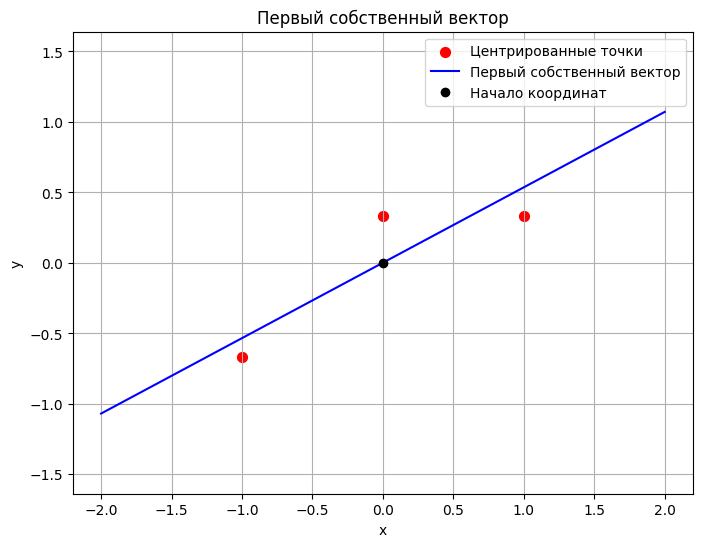

In [73]:
# Построение линии через начало координат и первый собственный вектор
x_line = np.array([-2, 2])

# первый вектор - eigenvecs[:,0]
# линия - y = kx, где k - отношение координат y/x собственного вектора
k = eigenvecs[1,0] / eigenvecs[0,0]
y_line = x_line * k

plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], c='red', s=50, label='Центрированные точки')
plt.plot(x_line, y_line, 'b-', label='Первый собственный вектор')
plt.plot([0], [0], 'ko', label='Начало координат')

plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title('Первый собственный вектор')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
